- 季節性效應
- 利用 pandas 讀取股票資訊
- 利用 matlibplot 畫出歷史走勢圖
- 利用 pandas 以每月 or 每年區分

In [1]:
# 引入模組

import pandas as pd
import matplotlib.pyplot as plt
import datetime

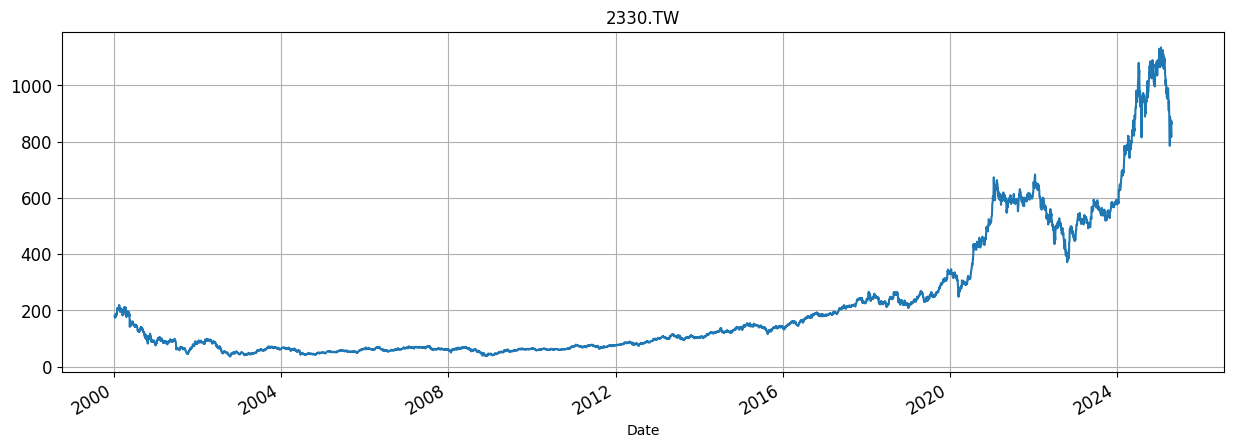

In [2]:
# 讀取股票資料
# 畫出歷史走勢圖

df = pd.read_csv("C:\\__STOCK\\DATA\\TWSE\\2330.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df = df.set_index("Date")

df["Close"].plot(title="2330.TW", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

       2001  2002  2003  2004  2005  2006  2007  2008   2009  2010  ...  \
Date                                                                ...   
01/02  83.5  86.0  42.5  65.5  51.0  61.0  67.7  60.5  46.25  64.9  ...   
01/03  80.5  85.5  44.8  65.5  51.0  62.9  68.0  59.4  46.25  64.9  ...   
01/04  85.0  89.0  44.8  65.5  49.6  63.4  67.7  60.0  46.25  64.9  ...   
01/05  90.5  89.0  44.8  66.0  48.5  64.0  66.9  60.0  46.25  64.5  ...   
01/08  89.5  90.5  46.5  65.5  48.5  64.0  65.8  56.0  41.55  64.0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...    ...   ...  ...   
12/25  83.5  44.7  62.0  50.0  63.0  65.1  59.6  43.1  63.40  70.8  ...   
12/26  82.5  46.0  62.0  50.0  63.8  66.0  59.5  43.4  63.40  70.8  ...   
12/27  82.0  45.5  62.0  49.9  63.8  66.4  61.7  43.4  63.40  70.7  ...   
12/28  85.0  45.5  62.0  50.0  63.5  66.1  60.5  43.4  63.70  70.9  ...   
12/31  87.5  42.6  63.5  50.5  63.5  66.1  62.0  44.4  64.50  71.0  ...   

        2015   2016   20

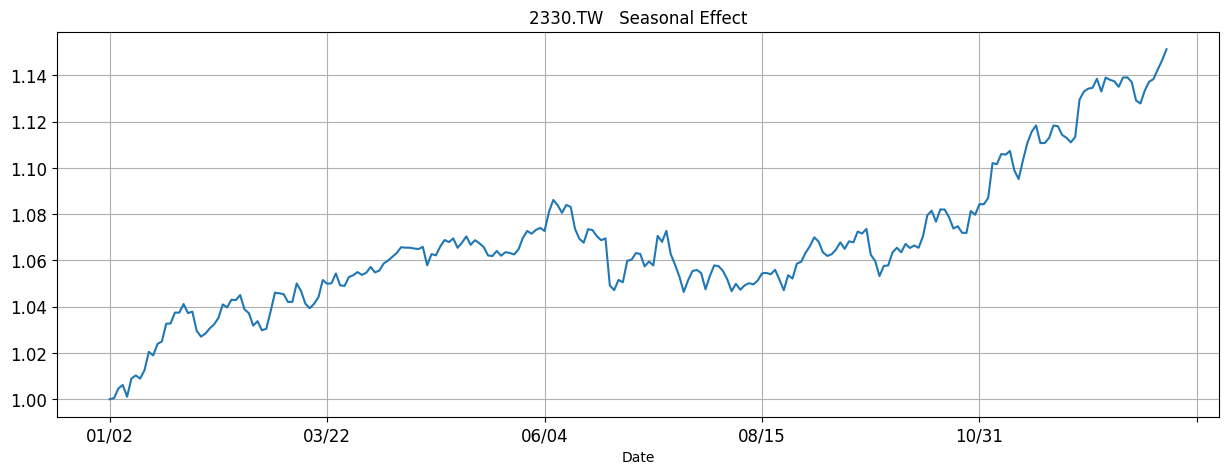

In [3]:
# 新增年份、月份、日期欄位
# 我們只要統計 2001-2024 的數據
# 以 2001 的日期為模板 (設定為 index)
# 將每一年的數據以年份的方式 Join 至原本的 DataFrame
# 計算每一天的報酬率 (全部除以第一天)
# 將每年且每天的報酬率取平均
# 用 matlibplot 畫出平均報酬率

df["Year"] = df.index.year
df["Month"] = df.index.month
df["Date"] = df.index.strftime("%m/%d")

df_Temp = df[df["Year"] == 2001].set_index(["Date"])
DateList = df_Temp.index
df_Months = pd.DataFrame(index=DateList)

for year in range(2001, 2025, 1):

    df_New = df[df["Year"] == year]
    df_New = df_New.set_index(["Date"])
    df_New = df_New.rename(columns={"Close":str(year)})
    df_New = df_New[[str(year)]]
    df_Months = df_Months.join(df_New).ffill().bfill()

print(df_Months)

df_Normal = df_Months / df_Months.iloc[0, :]
df_Normal["Average"] = df_Normal.mean(axis=1)

df_Normal["Average"].plot(title="2330.TW   Seasonal Effect", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

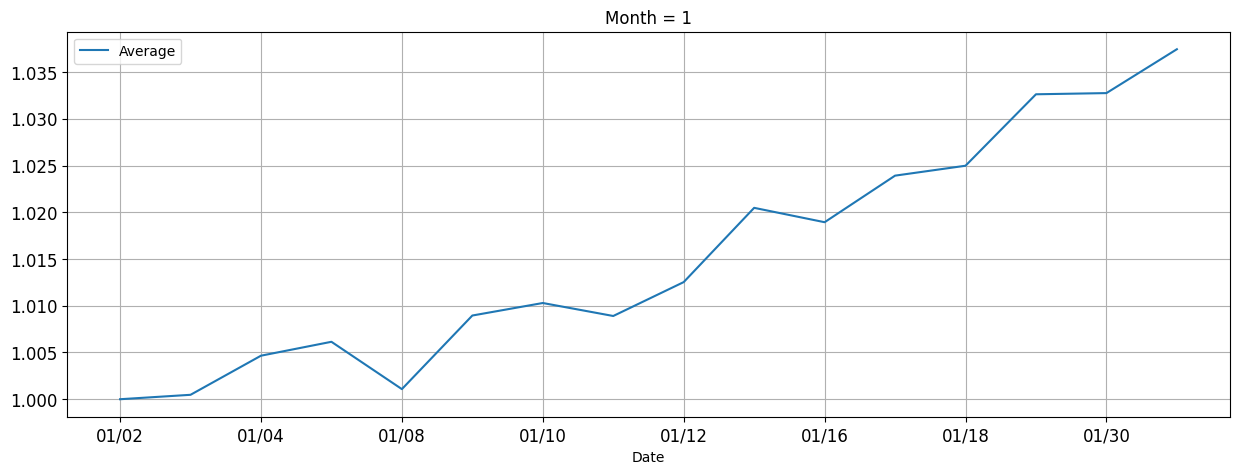

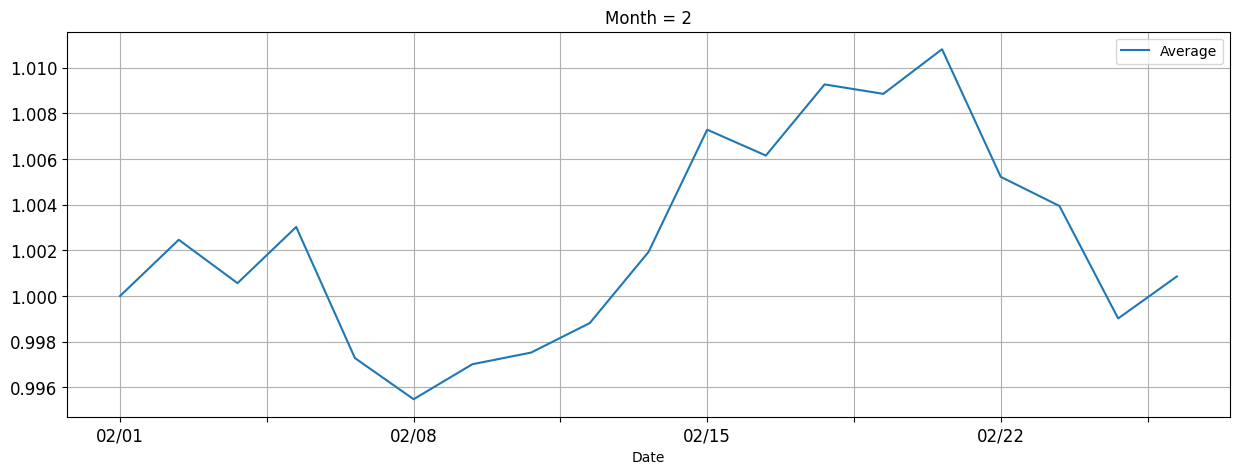

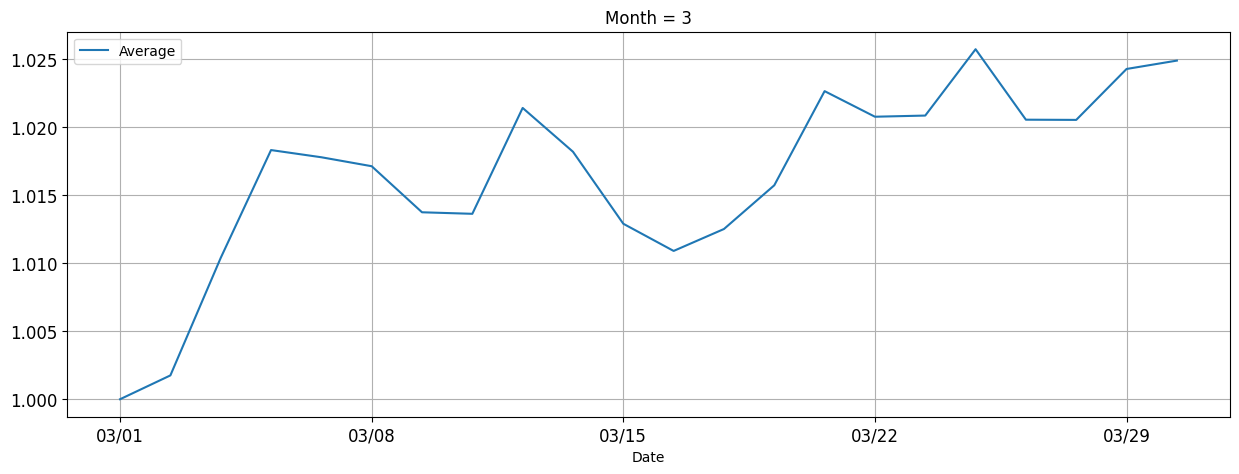

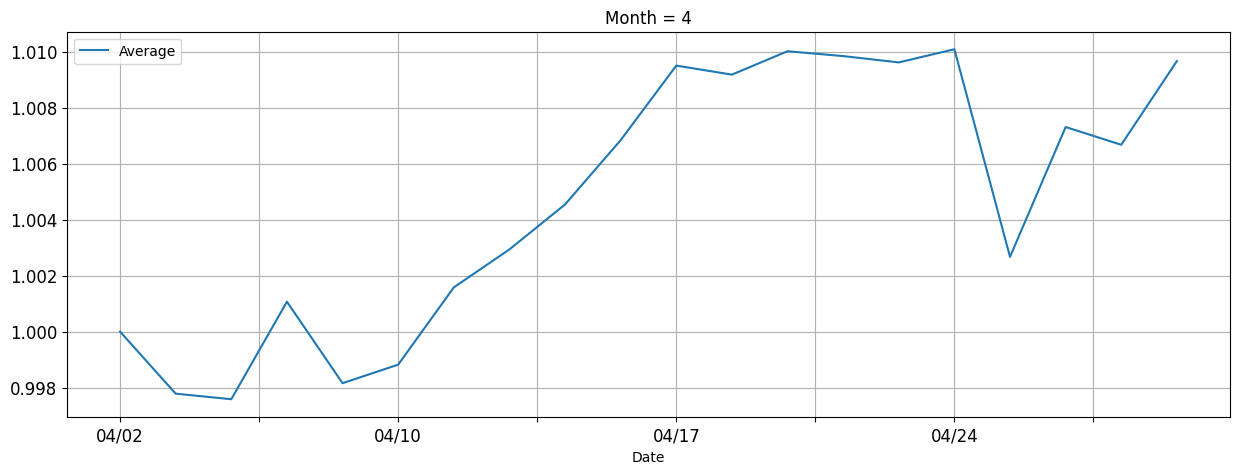

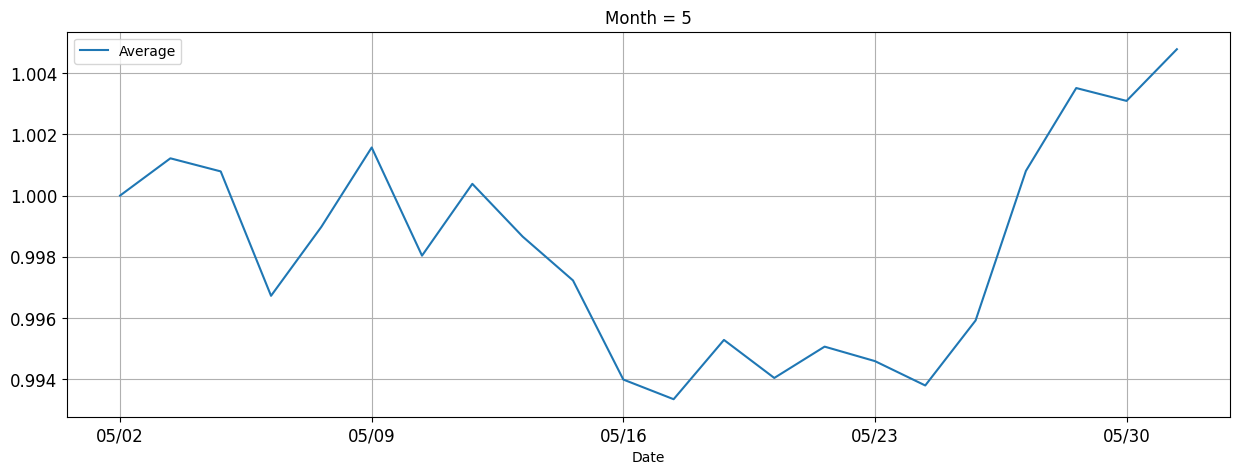

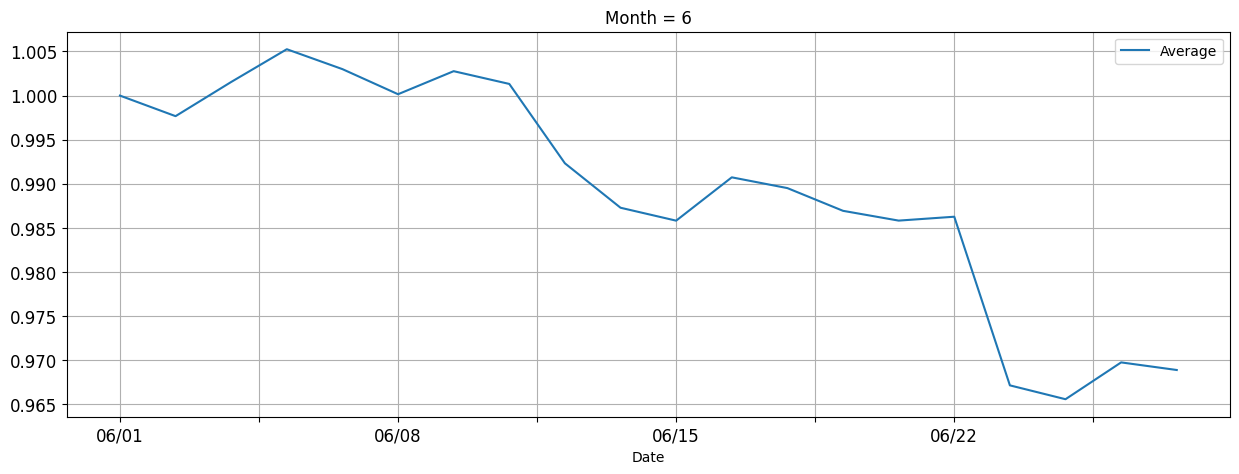

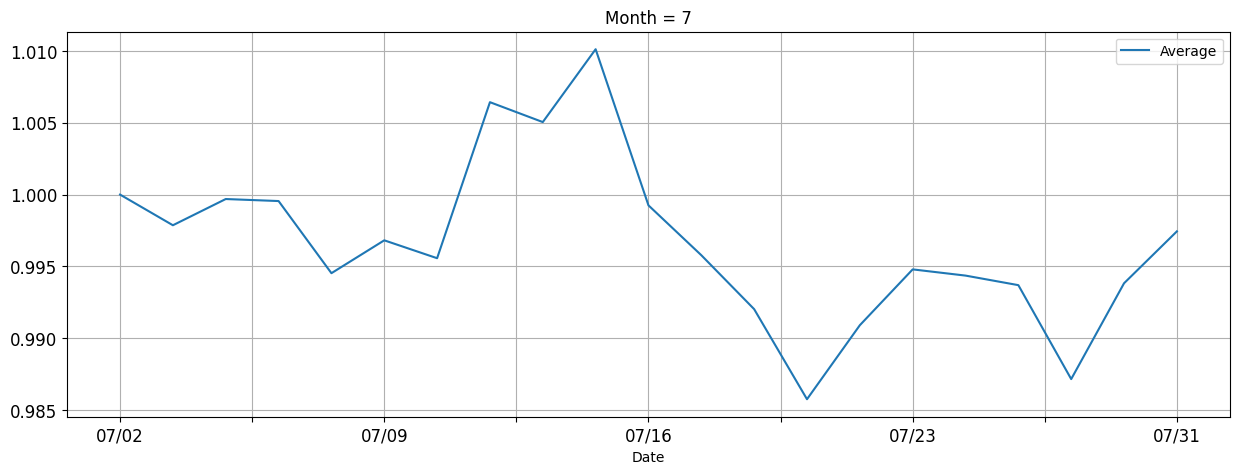

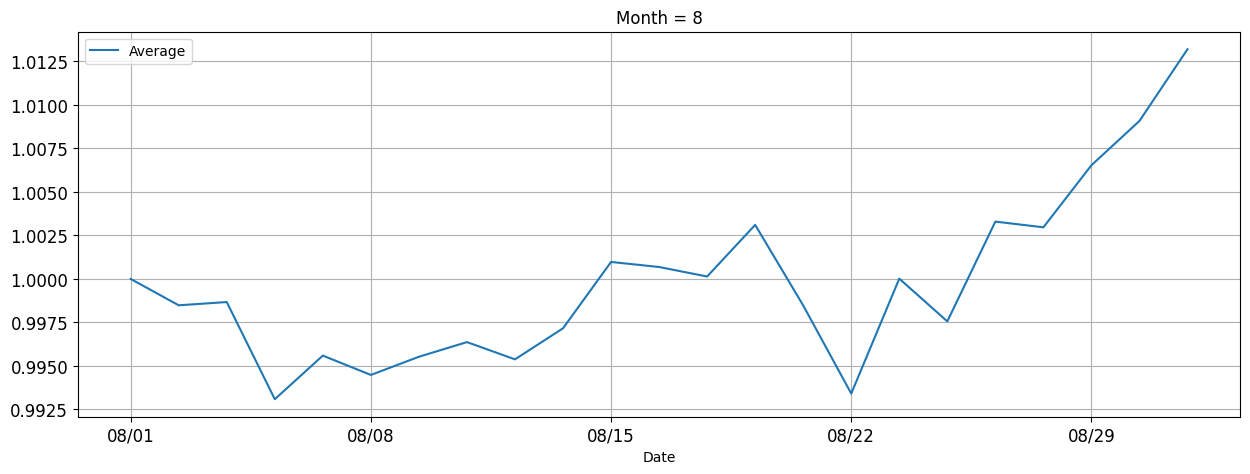

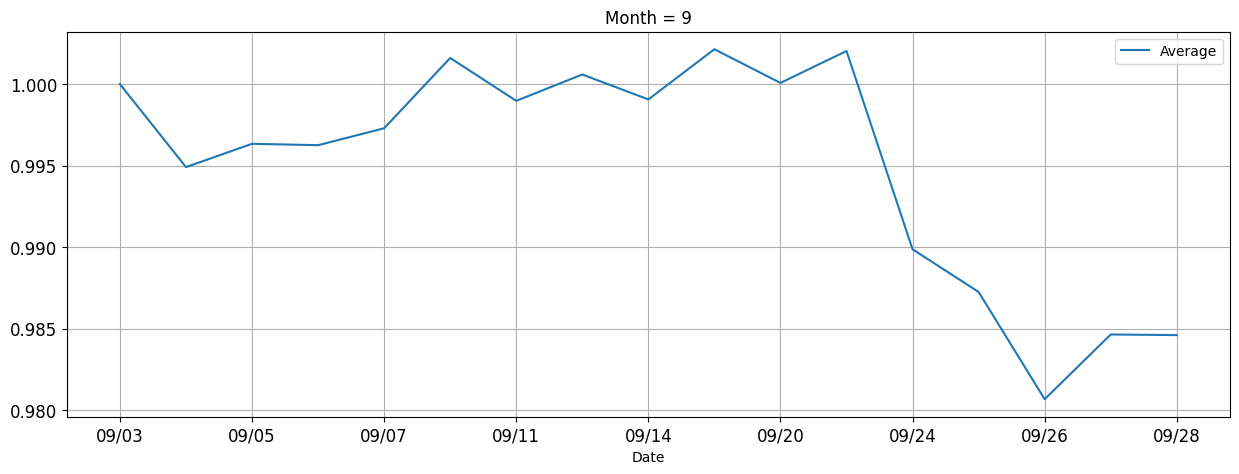

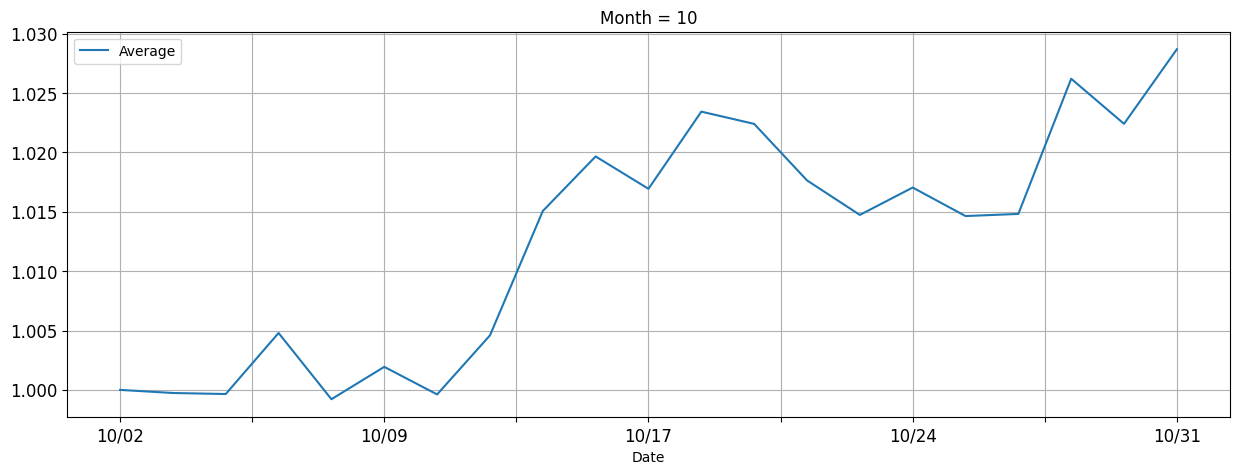

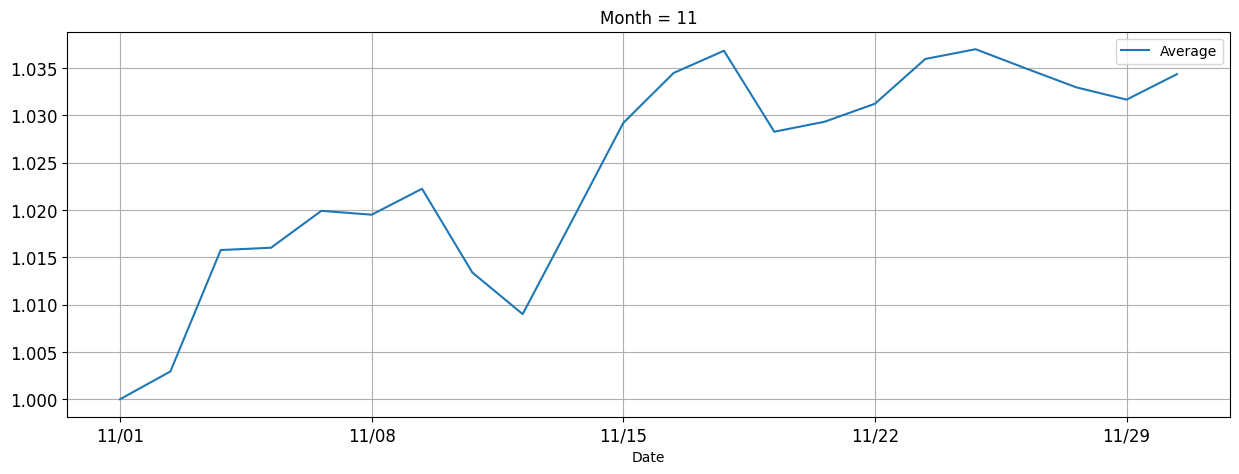

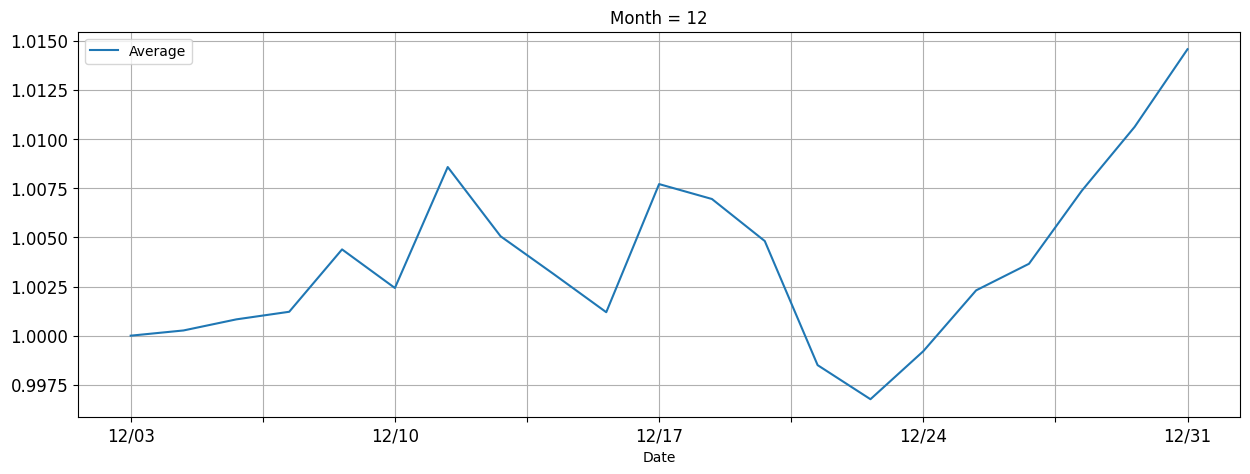

In [4]:
# 將不同年份且同月份的資料抓出來
# 平均每個月份的數據
# 用 matlibplot 畫出每個月的平均報酬率

for month in range(1, 13, 1):

    df_Temp = df[(df["Year"] == 2001) & (df["Month"] == month)]
    df_Temp = df_Temp.set_index(["Date"])
    DateList = df_Temp.index
    df_Temp = pd.DataFrame(index=DateList)

    for year in range(2001, 2025, 1):

        df_New = df[df["Year"] == year]
        df_New = df_New.set_index(["Date"])
        df_New = df_New.rename(columns={"Close":str(year)})
        df_New = df_New[[str(year)]]
        df_Temp = df_Temp.join(df_New).ffill().bfill()
    
    df_NormalMonth = df_Temp / df_Temp.iloc[0, :]
    df_NormalMonth["Average"] = df_NormalMonth.mean(axis=1)

    df_NormalMonth[["Average"]].plot(title=f"Month = {str(month)}", figsize=(15, 5), fontsize=12, grid=True)
    plt.show()